---
title: A python notebook 
subtitle:  How can we share with non-techy friends
date: 2024-12-11
date-format: iso
self-contained: true
---

VScode tells us about the `conda` environment we used... to make sure we can re-run the code at some pointer later.

Connected to nsd-analysis (Python 3.10.15)

## This is an `ipynb` notebook

A minimal working example of a python notebook and how to render to a nice version in `html` or `pdf`

:::{.content-hidden}

You hide bits of your notebook in the output. Material that is inside this special "fence" with the 3 colons is executed, but not used for document production...

```text
:::{.content-hidden}
bla bla
:::
```

In [94]:
# this is a comment inside a code cell
# but in our nice report we don't necessarily want to show
# this setup code...
from nilearn import datasets
from nilearn import plotting
from nilearn import surface
import numpy as np
import matplotlib.pyplot as plt

:::

Load in an example dataset that comes with the `nilearn` module. And also get the mesh data from the *freesurfer* `fsaverage` mesh.

In [95]:
STAT_IMG = datasets.load_sample_motor_activation_image()
fsaverage = datasets.fetch_surf_fsaverage()

To render the light gray and dark gray landmarks on the surface, we can use information about the curvature and label whether it is a a hump, gyrus or a trough, sulcus.

In [96]:
curv_right = surface.load_surf_data(fsaverage.curv_right)
curv_right_sign = np.sign(curv_right)
curv_left = surface.load_surf_data(fsaverage.curv_left)
curv_left_sign = np.sign(curv_left)

Now convert (*sample*) a 3d statistical image into the mesh format - a texture - that can be mapped onto the surface.

In [97]:
texture = surface.vol_to_surf(STAT_IMG, fsaverage.pial_right)

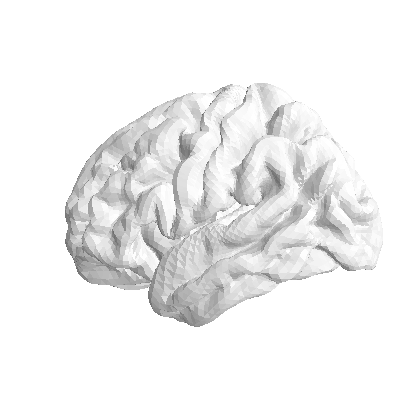

In [98]:
anat = plotting.plot_surf(fsaverage.pial_left, 
                          bg_map=curv_left_sign)

## Using more funky plotting

We can use a `nilearn` function to display a rendering in place.
 
```python
plotting.plot_surf_stat_map()
```

/var/folders/t6/cyw370ts3tqfydrs33_n_39m0000gr/T/ipykernel_53503/70457403.py:12: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



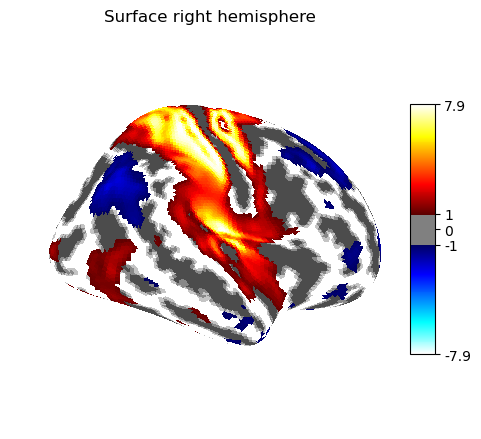

In [99]:
#| warning: false
#| echo: false
fig = plotting.plot_surf_stat_map(
    fsaverage.infl_right,
    texture,
    hemi="right",
    title="Surface right hemisphere",
    colorbar=True,
    threshold=1.0,
    bg_map=curv_right_sign,
)
fig.show()

some gratuitious maths 
$$
\sum_i \frac{(x_i - \bar{x})^2}{n}
$$